In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
plt.style.use("ggplot")

In [3]:
uploaded = files.upload()

Saving Bike_Sales.csv to Bike_Sales.csv


In [4]:
df = pd.read_csv("Bike_Sales.csv")

In [5]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [6]:
df.shape

(113036, 18)

In [7]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [8]:
# Convert "Date" column to datetime format.
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
# Looking for missing values.
df.isnull().sum()

,0
Date,0
Day,0
Month,0
Year,0
Customer_Age,0
Age_Group,0
Customer_Gender,0
Country,0
State,0
Product_Category,0


In [10]:
# Creating copy and dropping unnecessary columns.
df_clean = df.copy()
df_clean = df_clean.drop(["Day", "Month", "Year"], axis=1)
df_clean.head()

,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [11]:
# Subsetting (filtering) with a boolean mask to recognize missing values.
df_clean[df_clean.duplicated(subset=["Date","Customer_Age","Customer_Gender","Country","State","Product","Order_Quantity","Revenue"], keep = False)]


,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1020,2013-12-19,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1021,2013-12-19,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1090,2015-09-30,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1091,2015-09-30,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1092,2013-10-24,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10,8,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111265,2014-04-27,31,Young Adults (25-34),M,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Blue, 50",1,1482,2384,378,1482,1860
111952,2013-09-20,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735
111953,2013-09-20,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735
111954,2015-09-20,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735


In [12]:
# Dropping duplicates.
df_clean = df_clean.drop_duplicates(subset=["Date","Customer_Age","Customer_Gender","Country","State","Product","Order_Quantity","Revenue"])
df_clean = df_clean.reset_index(drop=True)

In [13]:
# Generate summary statistics.
df_clean.describe()

,Date,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,2014-11-23 05:22:32.008282880,35.919508,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
min,2011-01-01 00:00:00,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,2014-06-27 00:00:00,35.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,2016-01-09 00:00:00,43.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,2016-07-31 00:00:00,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000
std,NaN,11.016543,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623


In [14]:
# Adding Profit Margin Column.
df_clean["Profit_Margin"] = df_clean["Profit"] / df_clean["Revenue"] * 100

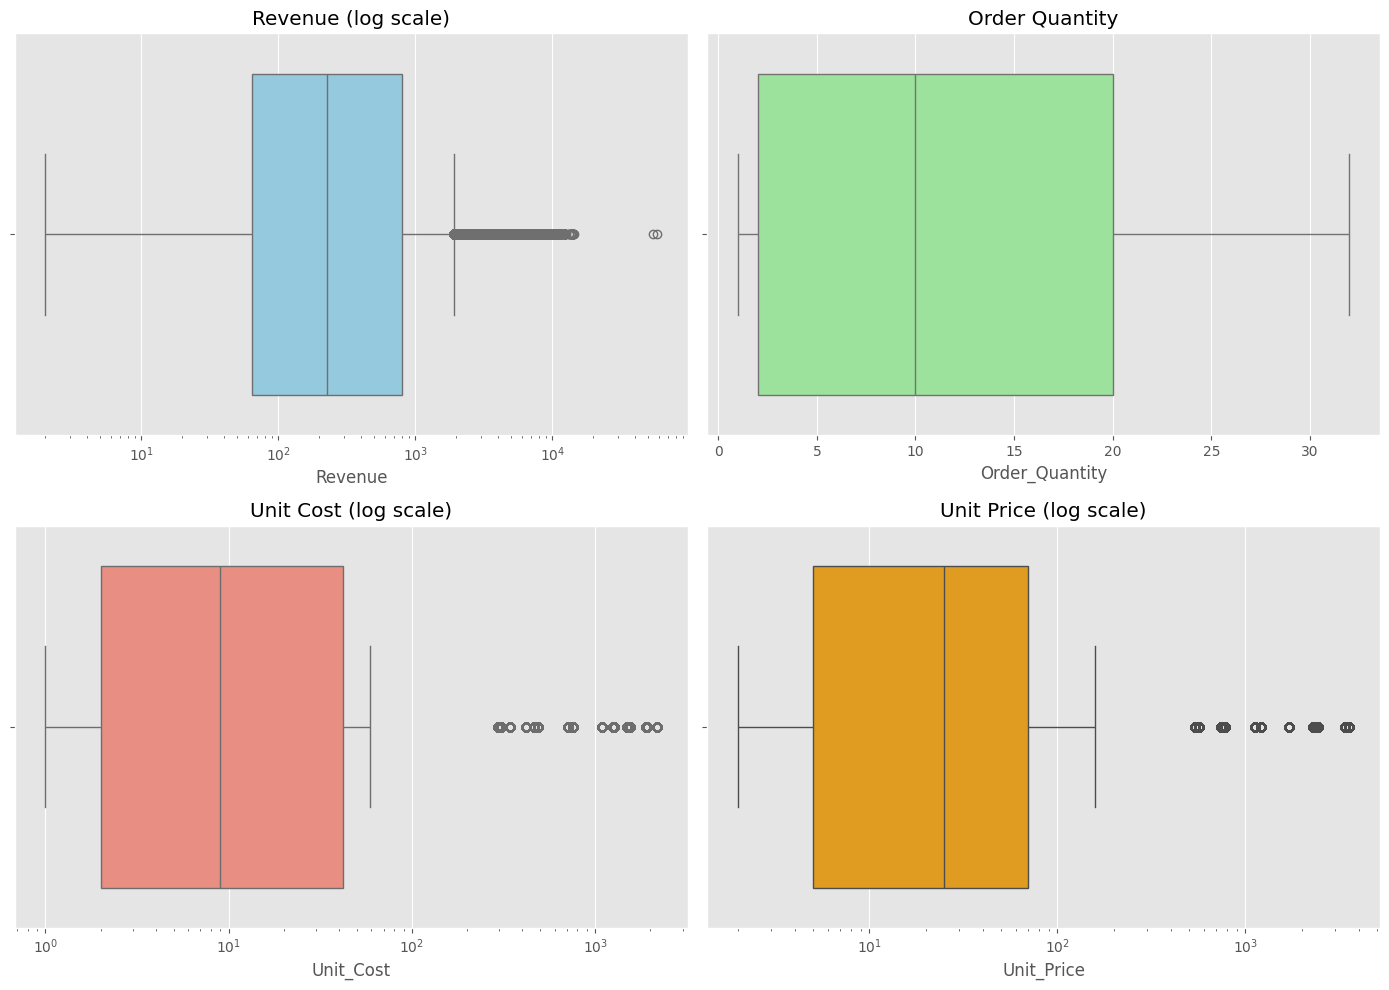

In [15]:
# Detecting Outliers.
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x="Revenue",
            data=df_clean,
            ax=axes[0,0],
            color="skyblue")
axes[0,0].set_xscale("log")
axes[0,0].set_title("Revenue (log scale)")


sns.boxplot(x="Order_Quantity",
            data=df_clean,
            ax=axes[0,1],
            color="lightgreen")
axes[0,1].set_title("Order Quantity")

sns.boxplot(x="Unit_Cost",
            data=df_clean,
            ax=axes[1,0],
            color="salmon")
axes[1,0].set_xscale("log")
axes[1,0].set_title("Unit Cost (log scale)")

sns.boxplot(x="Unit_Price",
            data=df_clean,
            ax=axes[1,1],
            color="orange")
axes[1,1].set_xscale("log")
axes[1,1].set_title("Unit Price (log scale)")

plt.tight_layout()
plt.show()

In [16]:
df_clean["Revenue"].sum()


np.int64(84826772)

In [17]:
df_clean["Profit"].sum()

np.int64(32046239)

In [18]:
df_clean["Profit_Margin"].mean()

np.float64(47.212543710398855)

In [19]:
df_clean["Order_Quantity"].mean()

np.float64(11.904253989788996)

In [20]:
df_clean.groupby("Country").agg({"Revenue": "sum",
                                 "Profit_Margin": "mean",
                                 "Profit": "mean"}).sort_values(by = "Revenue", ascending = False)

,Revenue,Profit_Margin,Profit
Country,,,
United States,27777098,48.154604,283.152369
Australia,21196395,41.839322,283.978851
United Kingdom,10575628,49.995962,325.076895
Germany,8956724,45.951477,303.798948
France,8414745,43.629490,263.011172
Canada,7906182,54.801102,263.920938


In [21]:
df_clean.groupby("Country")["Revenue"].sum().sort_values(ascending = False)

,Revenue
Country,
United States,27777098
Australia,21196395
United Kingdom,10575628
Germany,8956724
France,8414745
Canada,7906182


In [22]:
df_clean.groupby("Product_Category").agg({"Revenue" : "sum",
                                          "Order_Quantity" : "sum",
                                          "Profit_Margin" : "mean"}).sort_values(by= "Revenue", ascending = False)

,Revenue,Order_Quantity,Profit_Margin
Product_Category,,,
Bikes,61434484,36201,32.592335
Accessories,15022766,1042791,56.492086
Clothing,8369522,254713,31.496657


In [23]:
percentage_of_salesbyagegroup = (df_clean.groupby("Age_Group")["Revenue"].sum() / df_clean["Revenue"].sum() * 100).sort_values( ascending = False)
percentage_of_salesbyagegroup

,Revenue
Age_Group,
Adults (35-64),49.945530
Young Adults (25-34),35.916765
Youth (<25),13.775709
Seniors (64+),0.361997


In [24]:
avg_order_value = (df_clean.groupby("Age_Group")["Revenue"].sum() / df_clean.groupby("Age_Group")["Order_Quantity"].sum()).sort_values(ascending = False)
avg_order_value

,0
Age_Group,
Young Adults (25-34),68.777909
Adults (35-64),63.509681
Youth (<25),54.624743
Seniors (64+),31.633872


In [25]:
total_profitbyage = df_clean.groupby("Age_Group")["Profit"].sum()
profit_sharepercent = (total_profitbyage / total_profitbyage.sum()) * 100

In [26]:
customer_demographic_analysis = pd.DataFrame({"Percentage of Sales (100%)" : percentage_of_salesbyagegroup,
              "Profit (100%)" : profit_sharepercent,
              "Average Order Value" : avg_order_value,}).sort_values(by = "Percentage of Sales (100%)", ascending = False)

In [27]:
np.mean(df_clean["Profit_Margin"])

np.float64(47.212543710398855)

In [28]:
df_clean.groupby("Product").agg({"Revenue": "sum",
                                 "Profit": "sum",
                                 "Order_Quantity": "sum"}).nlargest(5, "Revenue").sort_values(by = "Profit", ascending = False)

,Revenue,Profit,Order_Quantity
Product,,,
"Mountain-200 Black, 38",3345501,1302237,1632
"Road-150 Red, 62",3810023,1237388,1185
"Mountain-200 Silver, 42",3070174,1226878,1456
"Road-150 Red, 52",3152610,1044569,971
"Road-150 Red, 56",3142811,1004376,985


/tmp/ipython-input-779833565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=prop.index,
/tmp/ipython-input-779833565.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{i*100:.0f}%" for i in ax.get_yticks()])


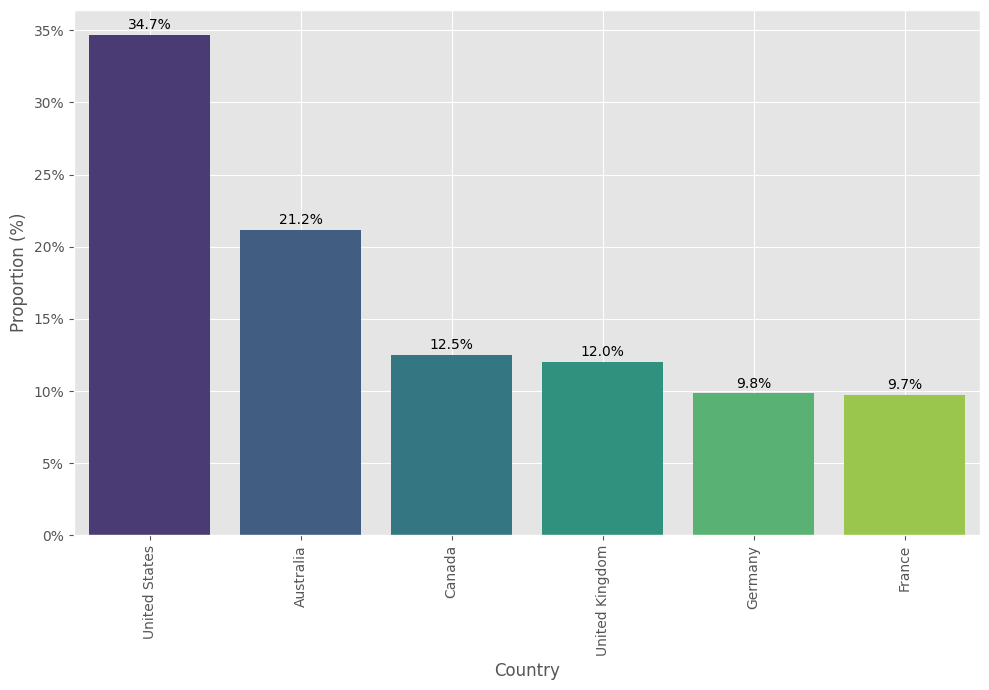

In [29]:
# Plotting the proportion of records by country as a percentage bar chart.
prop = df_clean["Country"].value_counts(normalize = True)

plt.figure(figsize=(10, 7))
ax = sns.barplot(x=prop.index,
                 y=prop.values,
                 palette="viridis")

for bar, val in zip(ax.patches, prop.values):
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.004,
            f"{val*100:.1f}%",
            ha='center')

plt.grid(True)
plt.xlabel("Country")
plt.ylabel("Proportion (%)")
ax.set_yticklabels([f"{i*100:.0f}%" for i in ax.get_yticks()])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



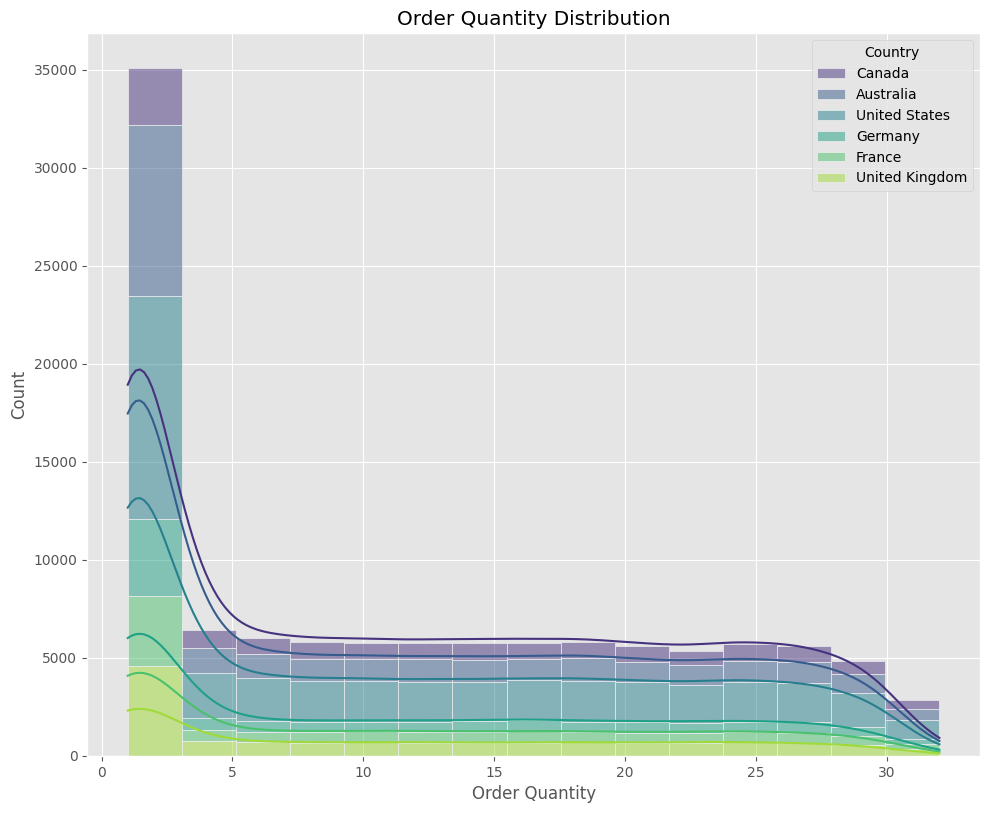

In [30]:
# Plot stacked histograms of Order Quantity distribution across countries.
plt.figure(figsize = (10,8))

sns.histplot(data = df_clean,
             x = "Order_Quantity",
             bins = 15,
             kde = True,
             hue = "Country",
             multiple = "stack",
             palette = "viridis")

plt.tight_layout()
plt.xlabel("Order Quantity")
plt.title("Order Quantity Distribution")
plt.show()

/tmp/ipython-input-3927190611.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = country_product_counts.index,


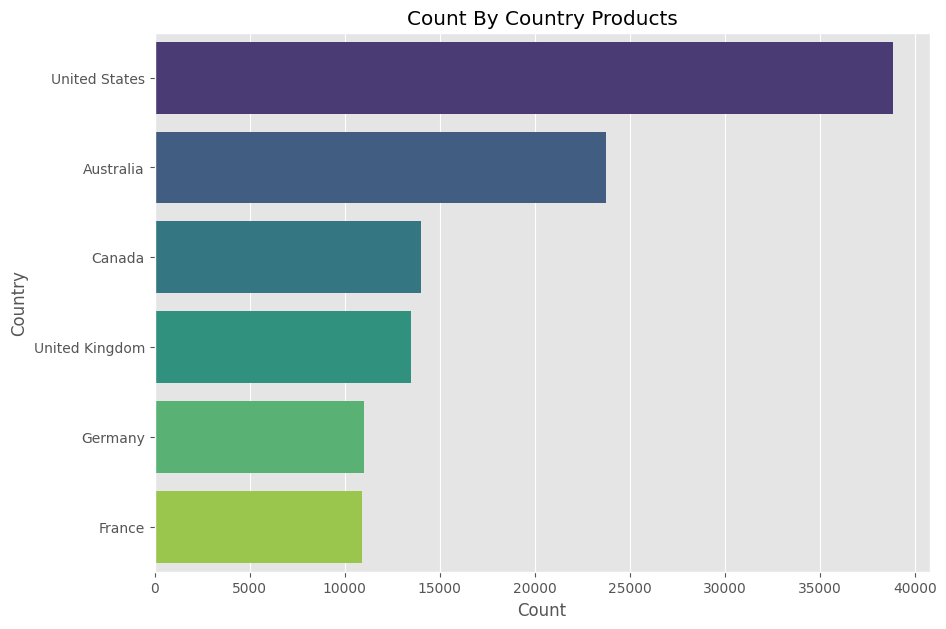

In [31]:
# Plot the number of product records per country as a horizontal bar chart.
country_product_counts = df_clean.groupby("Country")["Product"].agg(["count"]).sort_values(by = "count", ascending = False)

plt.figure(figsize = (10,7))
sns.barplot(y = country_product_counts.index,
            x = country_product_counts["count"],
            palette= "viridis")

plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Count By Country Products")
plt.show()

In [32]:
# Extracting year from the date column.
df_clean["Year"] = df_clean["Date"].dt.year


In [33]:
# Create a pivot table showing total revenue per country across different years.
pt = df_clean.pivot_table(
    values="Revenue",
    index="Country",
    columns="Year",
    aggfunc="sum",
    fill_value=0)

print(pt.head())


Year               2011     2012     2013     2014     2015     2016
Country                                                             
Australia       2527984  2545407  4074626  2782540  5687580  3578258
Canada           787379   827590  1440361  1464413  1728374  1658065
France           946624   962153  1425103  1409072  1871282  1800511
Germany          833603   835188  1446051  1696626  1925113  2220143
United Kingdom   823481   834885  1853657  1986340  2476886  2600379


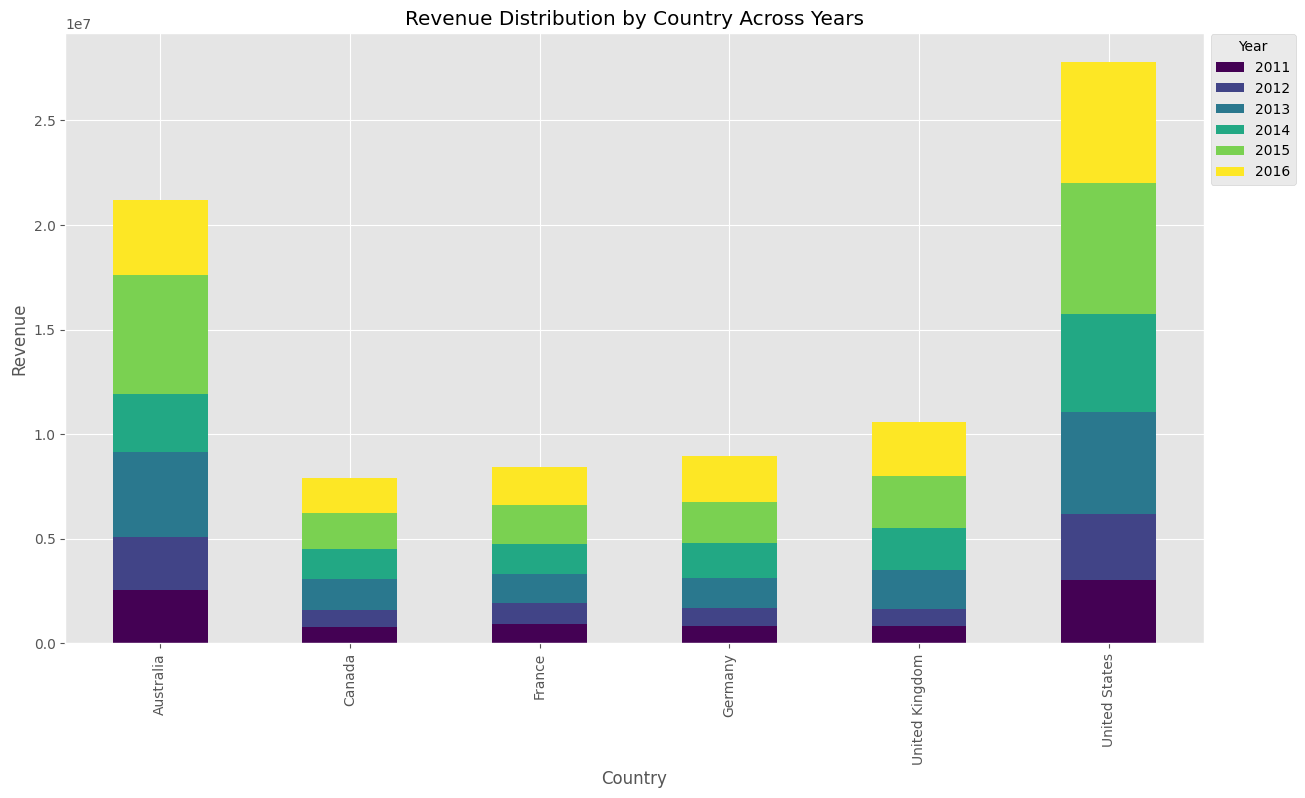

In [34]:
# Plot a stacked bar chart of revenue by country across different years.
pt.plot(kind="bar",
        stacked=True,
        figsize=(12,8),
        colormap="viridis")

plt.tight_layout()
plt.title("Revenue Distribution by Country Across Years")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.legend(title="Year",
           bbox_to_anchor=(1, 1.01),
           loc="upper left")
plt.show()


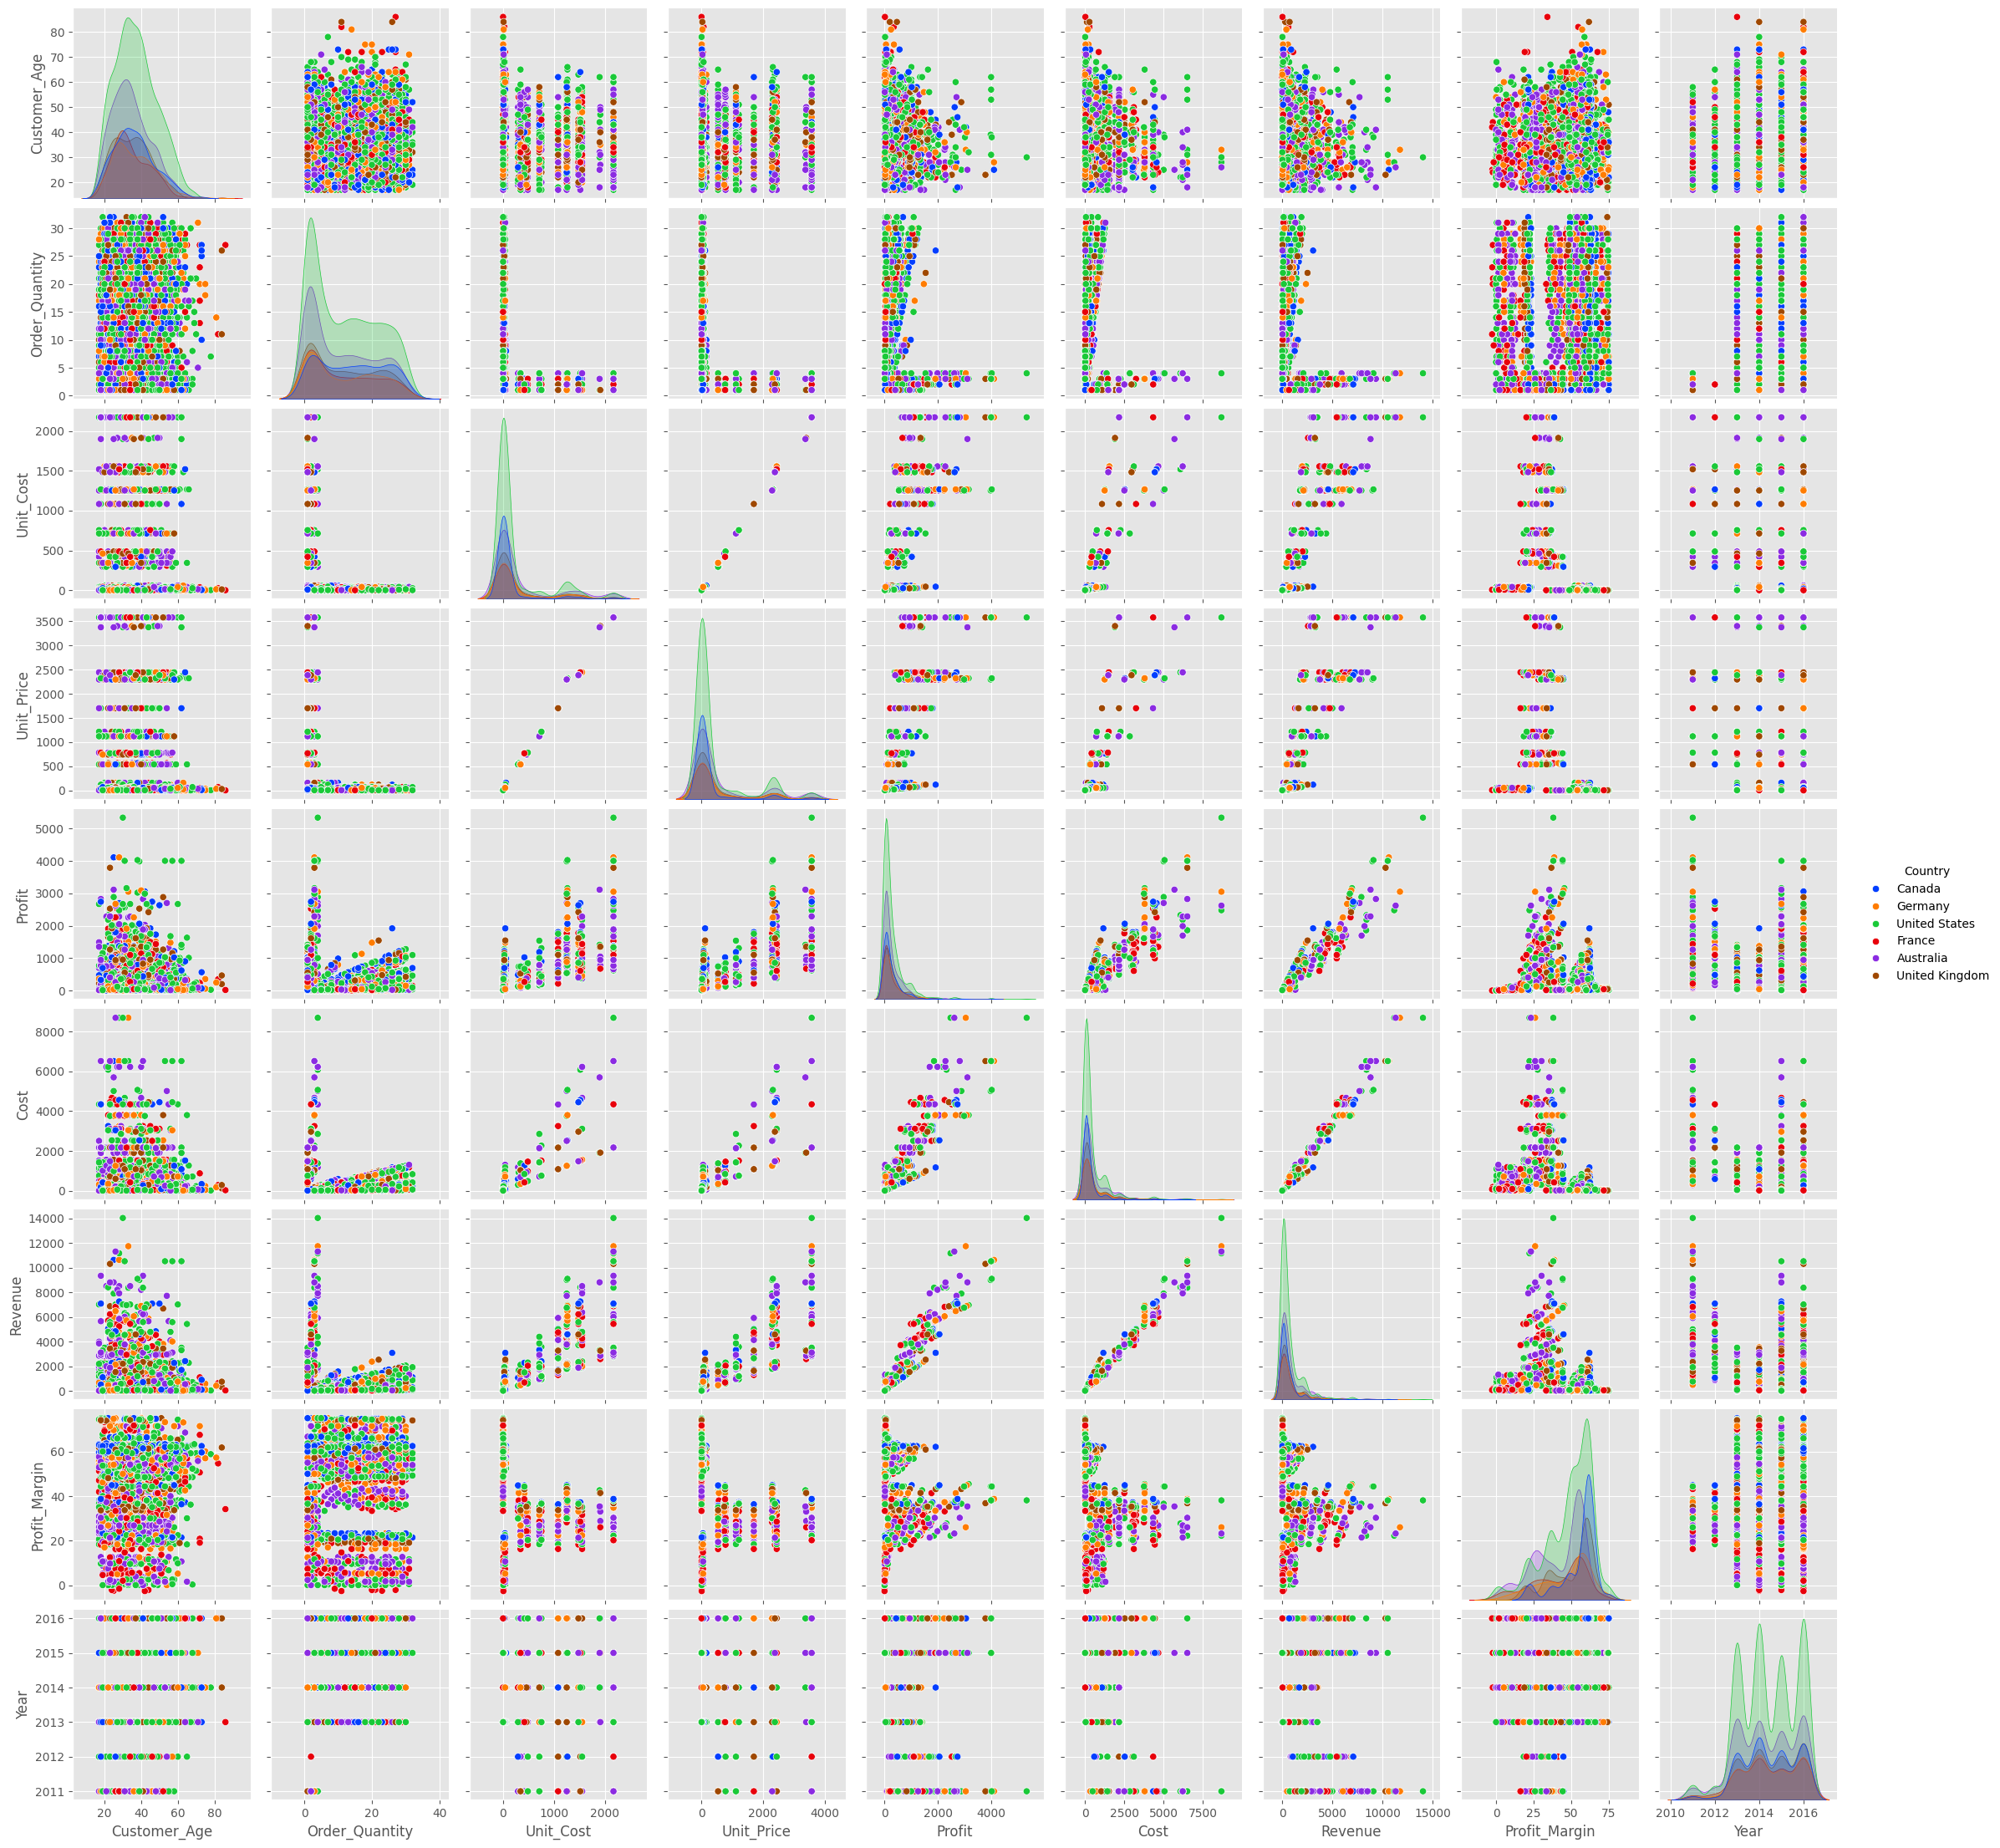

In [35]:
# Perform random sampling to reduce the rendering time.
df_sample = df_clean.sample(n = 5000, random_state = 0)
# The code below create a pairplot to visualize pairwise relationships among key numeric feature.
sns.pairplot(df_sample,
             vars = ["Customer_Age","Order_Quantity","Unit_Cost","Unit_Price",
                     "Profit", "Cost","Revenue","Profit_Margin","Year"],
             hue="Country",
             palette = "bright")
plt.show()

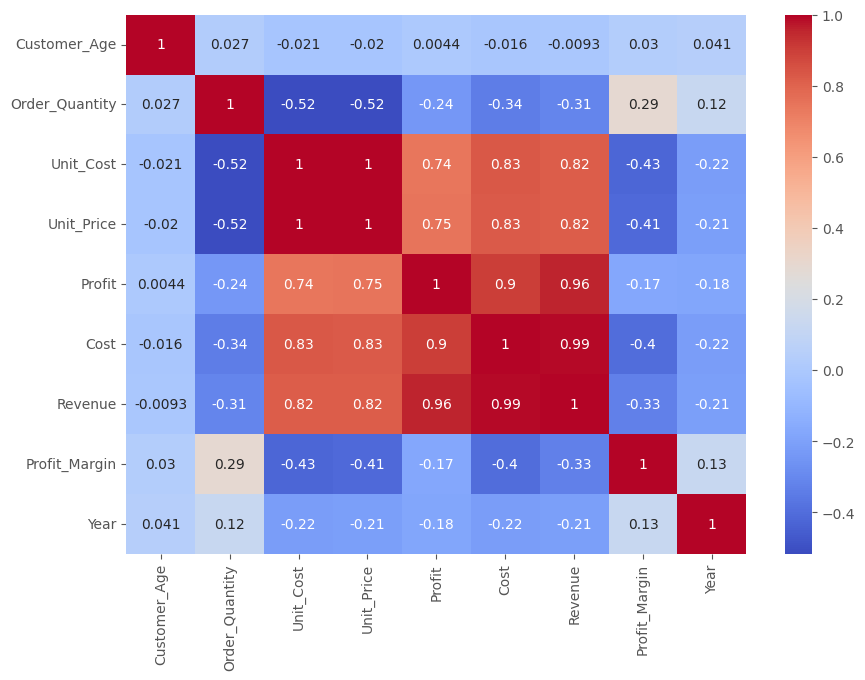

In [36]:
# Creating heatmap plot to indentify correlations between quantitative variables.
plt.figure(figsize = (10,7))
sns.heatmap(df_clean.select_dtypes(include = "number").corr(),
            annot = True,
            cmap = "coolwarm")
plt.show()

/tmp/ipython-input-681591364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Country",
/tmp/ipython-input-681591364.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Country",
/tmp/ipython-input-681591364.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Country",
/tmp/ipython-input-681591364.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Country",


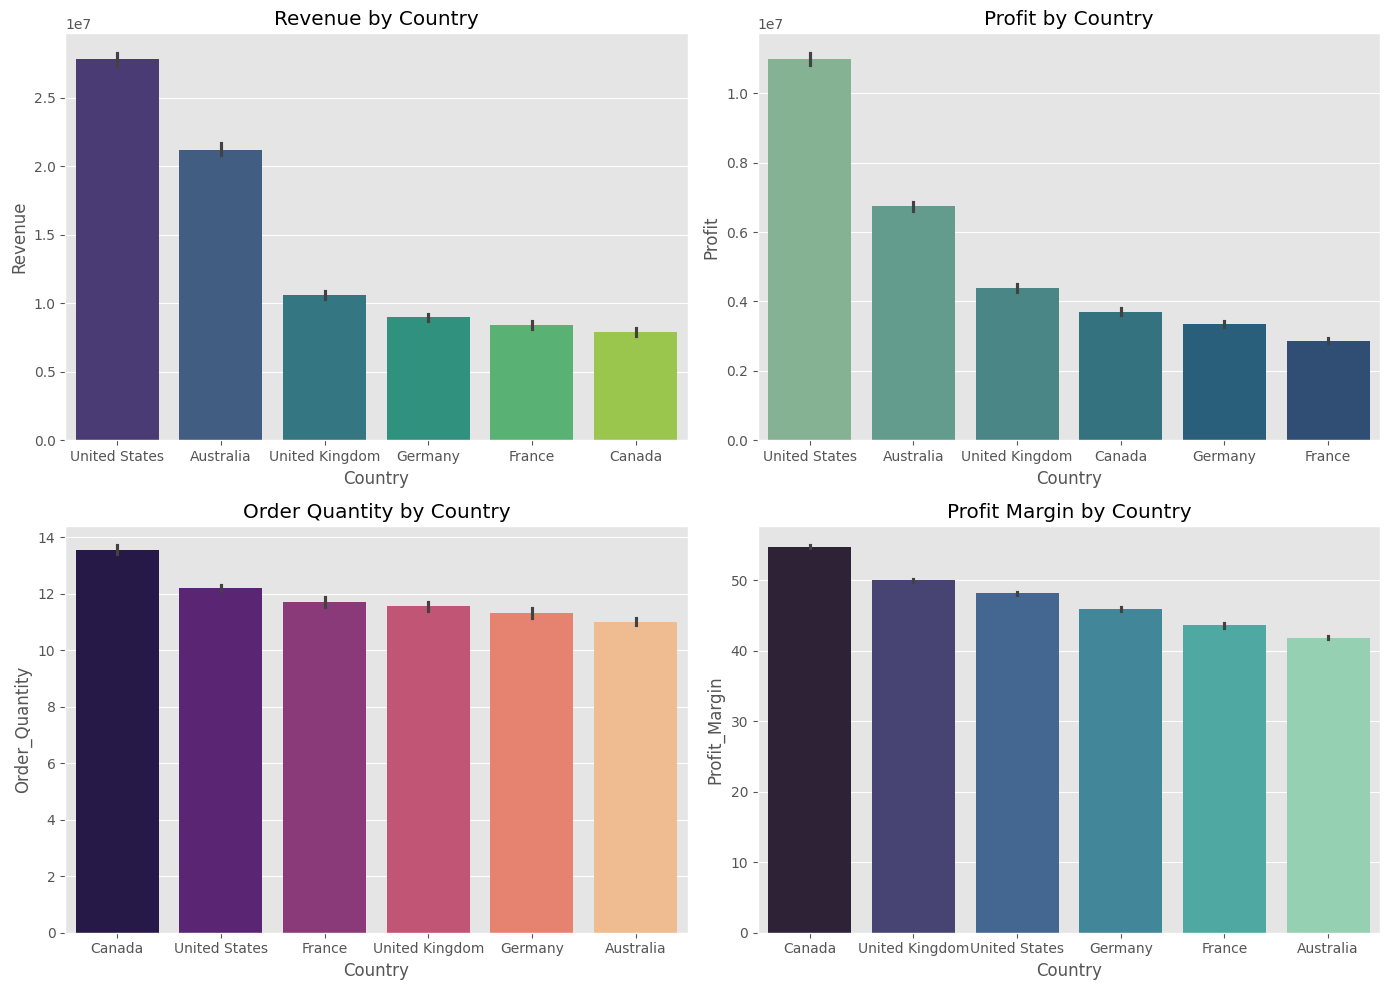

In [37]:
# The code below Creates a 2x2 grid of barplots to compare countries by:

fig, axes = plt.subplots(2,2, figsize = (14,10))
# (1) Total Revenue
sort_cr = df_clean.groupby("Country")["Revenue"].sum().sort_values(ascending= False).index
sns.barplot(x = "Country",
            y = "Revenue",
            data = df_clean,
            order = sort_cr,
            palette = "viridis",
            ax = axes[0,0],
            estimator = sum)
axes[0,0].set_title("Revenue by Country")

# (2) Total Profit
sort_cp = df_clean.groupby("Country")["Profit"].sum().sort_values(ascending= False).index
sns.barplot(x = "Country",
            y = "Profit",
            data = df_clean,
            order = sort_cp,
            palette = "crest",
            ax = axes[0,1],
            estimator = sum)
axes[0,1].set_title("Profit by Country")

# (3) Average Order Quantity
sort_coq = df_clean.groupby("Country")["Order_Quantity"].mean().sort_values(ascending= False).index
sns.barplot(x = "Country",
            y = "Order_Quantity",
            data = df_clean,
            order = sort_coq,
            palette = "magma",
            ax = axes[1,0])
axes[1,0].set_title("Order Quantity by Country")

# (4) Average Profit Margin
sort_cpm = df_clean.groupby("Country")["Profit_Margin"].mean().sort_values(ascending= False).index
sns.barplot(x = "Country",
            y = "Profit_Margin",
            data = df_clean,
            order = sort_cpm,
            palette = "mako",
            ax = axes[1,1])
axes[1,1].set_title("Profit Margin by Country")

plt.tight_layout()
plt.show()

In [38]:
# Setting "Date" as an index for Time series analysis
df_time = df_clean.set_index("Date")
df_time.head()


,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_Margin,Year
Date,,,,,,,,,,,,,,,,
2013-11-26,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,62.105263,2013
2015-11-26,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,62.105263,2015
2014-03-23,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,56.892961,2014
2016-03-23,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,56.896552,2016
2014-05-15,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,56.937799,2014


/tmp/ipython-input-3791854860.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  m_revenue =df_time.groupby("Country")["Revenue"].resample("M").sum().reset_index()


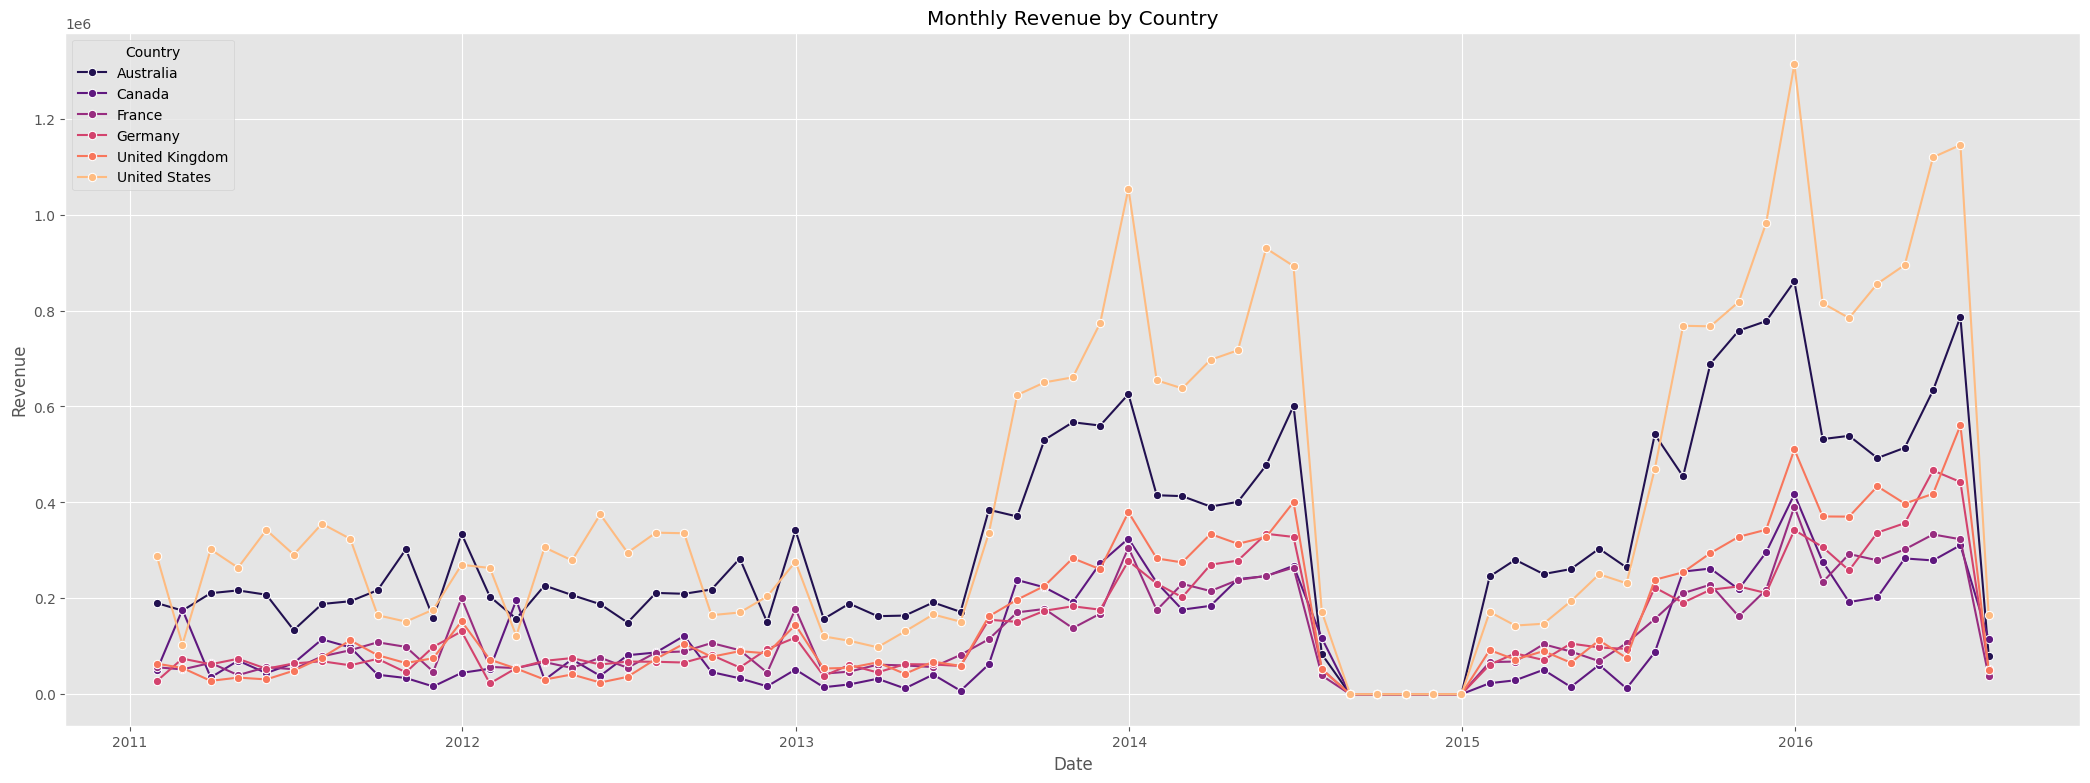

In [39]:
# Resampling revenue data by month for each country and plot monthly revenue insights.

m_revenue =df_time.groupby("Country")["Revenue"].resample("M").sum().reset_index()
plt.figure(figsize=(26,9))
sns.lineplot(x="Date",
             y="Revenue",
             hue="Country",
             data=m_revenue,
             marker="o",
             palette="magma")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Monthly Revenue by Country")
plt.show()


In [40]:
"""
If we observe the line chart above, we can see that at the end of the year 2014, revenue reached zero.
To find out, we write the query below to uncover data where it's zero.
"""
df_clean.query("Revenue >= 0.0 and Revenue <= 10")


,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_Margin,Year
1091,2015-10-24,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,1,4,10,4,4,8,50.000000,2015
1115,2014-02-08,37,Adults (35-64),F,Australia,South Australia,Accessories,Bottles and Cages,Road Bottle Cage,1,3,9,4,3,7,57.142857,2014
1138,2015-07-29,40,Adults (35-64),M,Australia,Victoria,Accessories,Bottles and Cages,Water Bottle - 30 oz.,1,2,5,2,2,4,50.000000,2015
1155,2015-10-22,22,Youth (<25),F,United States,Washington,Accessories,Bottles and Cages,Water Bottle - 30 oz.,1,2,5,2,2,4,50.000000,2015
1190,2014-04-24,42,Adults (35-64),M,France,Seine Saint Denis,Accessories,Bottles and Cages,Water Bottle - 30 oz.,1,2,5,2,2,4,50.000000,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107375,2013-10-10,55,Adults (35-64),M,France,Seine (Paris),Accessories,Tires and Tubes,Patch Kit/8 Patches,5,1,2,3,5,8,37.500000,2013
107376,2015-10-10,55,Adults (35-64),M,France,Seine (Paris),Accessories,Tires and Tubes,Patch Kit/8 Patches,1,1,2,1,1,2,50.000000,2015
107377,2015-10-10,55,Adults (35-64),M,France,Seine (Paris),Accessories,Tires and Tubes,Patch Kit/8 Patches,2,1,2,1,2,3,33.333333,2015
107391,2014-04-27,37,Adults (35-64),F,France,Seine (Paris),Accessories,Tires and Tubes,Patch Kit/8 Patches,5,1,2,3,5,8,37.500000,2014


In [41]:
"""
Above, we can observe that there were 4564 rows with rather low revenue.
To affirm whether there were any errors in calculations or not, we use the following query below.
"""
df_clean.query("Profit == 0.0 and Revenue != Cost")

,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_Margin,Year


/tmp/ipython-input-52937800.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_gender.index,
/tmp/ipython-input-52937800.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = rev_prod.index,
/tmp/ipython-input-52937800.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top10_products.index,


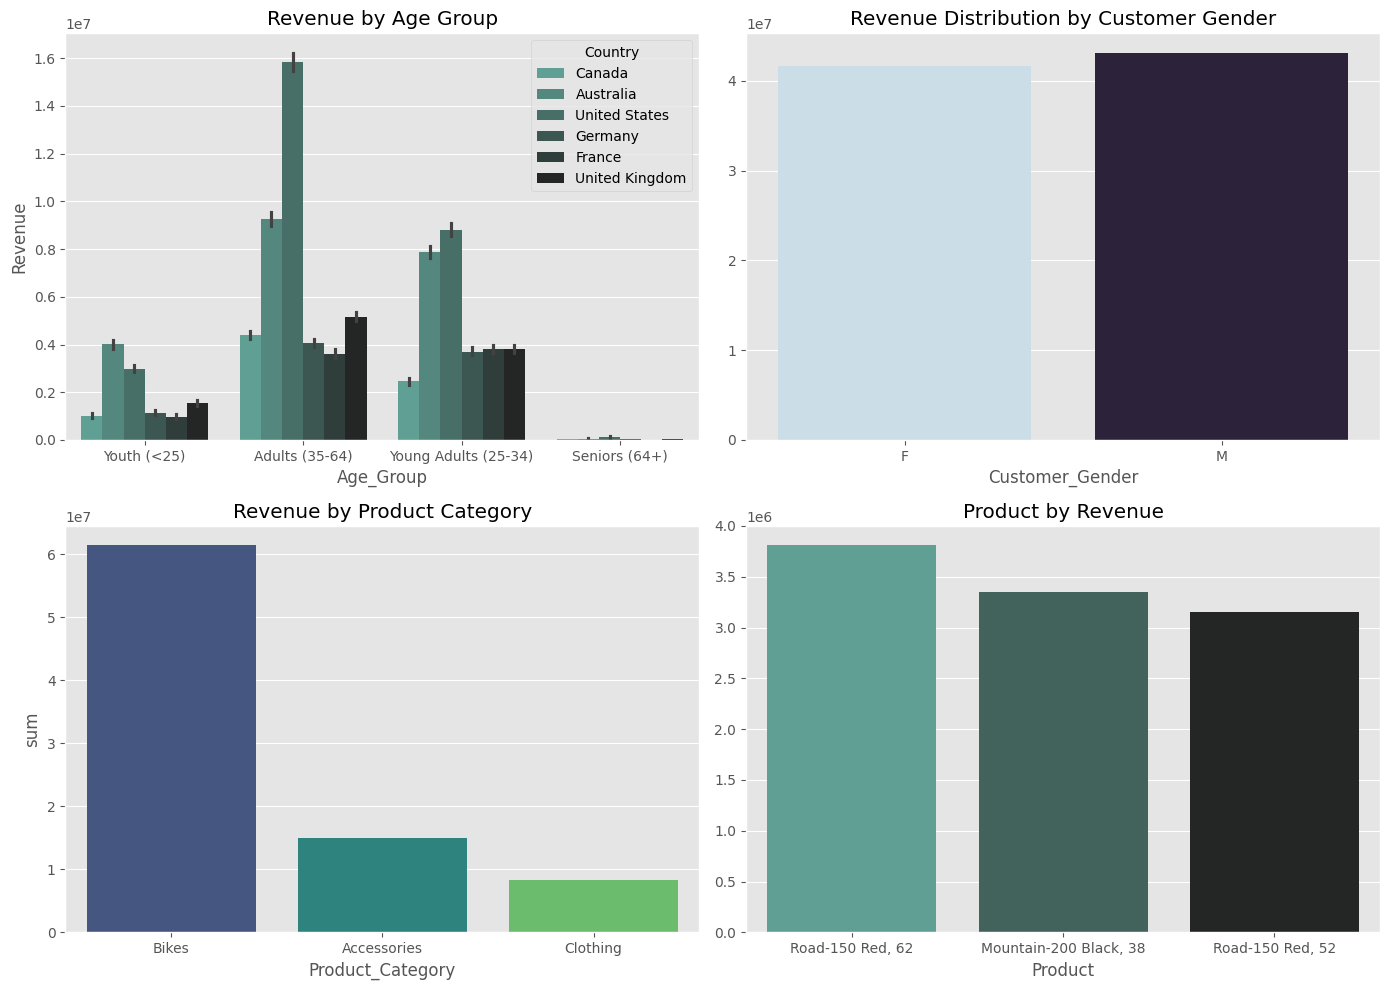

In [42]:
# Create a 2x2 grid of barplots to analyze revenue by different dimensions.

fig, axes= plt.subplots(2,2, figsize = (14,10))

# Top-left -> Revenue by Age Group and Country.
sns.barplot(x="Age_Group",
            y="Revenue",
            hue="Country",
            data=df_clean,
            estimator=sum,
            palette="dark:#5A9_r",
            ax = axes[0,0])
axes[0,0].set_title("Revenue by Age Group")

# Top-right -> Revenue distribution by Customer Gender.
sales_by_gender = df_clean.groupby('Customer_Gender')['Revenue'].sum()
sns.barplot(x=sales_by_gender.index,
            y=sales_by_gender.values,
            palette= "ch:s=.25,rot=-.25",
            ax = axes[0,1])
axes[0,1].set_title('Revenue Distribution by Customer Gender')

# Bottom-left -> Total Revenue by Product Category.
rev_prod = df_clean.groupby("Product_Category")["Revenue"].agg(["sum"]).sort_values(by = "sum" ,ascending = False)
sns.barplot(x = rev_prod.index,
            y = rev_prod["sum"],
            palette = "viridis",
            ax = axes[1,0])
axes[1,0].set_title("Revenue by Product Category")

# Bottom-right -> Top 3 Products by Revenue.
top10_products = df_clean.groupby("Product")["Revenue"].sum().nlargest(3)
sns.barplot(x = top10_products.index,
            y = top10_products.values,
            ax = axes[1,1],
            estimator = sum,
            palette="dark:#5A9_r")
axes[1,1].set_title("Product by Revenue")

plt.tight_layout()
plt.show()

np.float64(11.904253989788996)